In [45]:
___Author___='LumberJack Jyss'

In [46]:
print('Global Optimized LumberJack Equities Method\n°OoO_TRENDLINE_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_TRENDLINE_Oo0°
LumberJack Jyss 5779(c)


In [65]:
print('Importation des librairies...')
import numpy as np
import pandas as pd
import pandas
import sys
from sklearn.linear_model import LinearRegression
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('Librairies importées')

Importation des librairies...
Librairies importées


In [48]:
# SCRAPING DES DONNES BRUTES
eurusd = pd.read_csv('eurusd_15mn_1Y.csv')
eurusd = eurusd.set_index('Date')
eurusd = eurusd.iloc[:-2,1:-1]

In [49]:
df = eurusd.iloc[-97:-5,:]
df.shape

(92, 4)

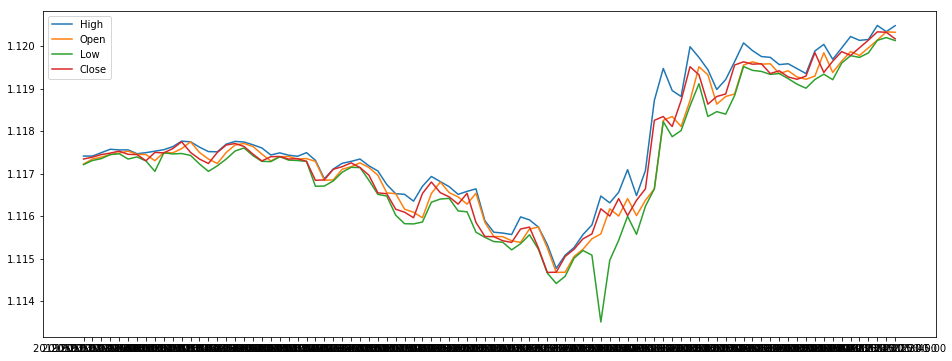

In [50]:
plt.figure(figsize=(16,6))
plt.plot(df['High'])
plt.plot(df['Open'])
plt.plot(df['Low'])
plt.plot(df['Close'])
plt.legend()

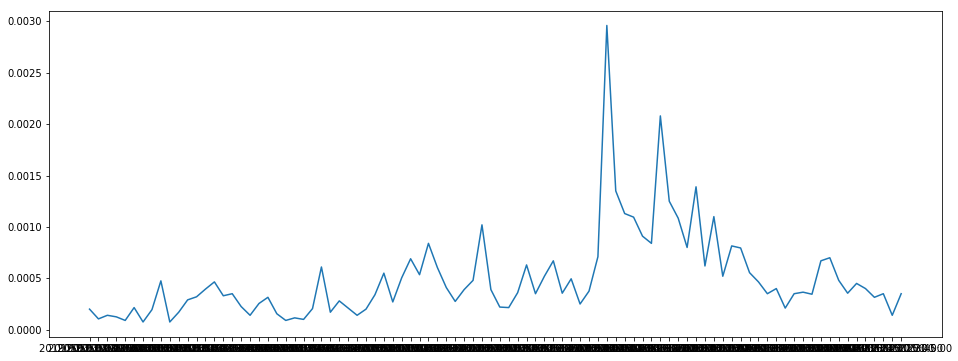

In [51]:
plt.figure(figsize=(16,6))
plt.plot((df['High']-df['Low']),label='Delat High - Close')

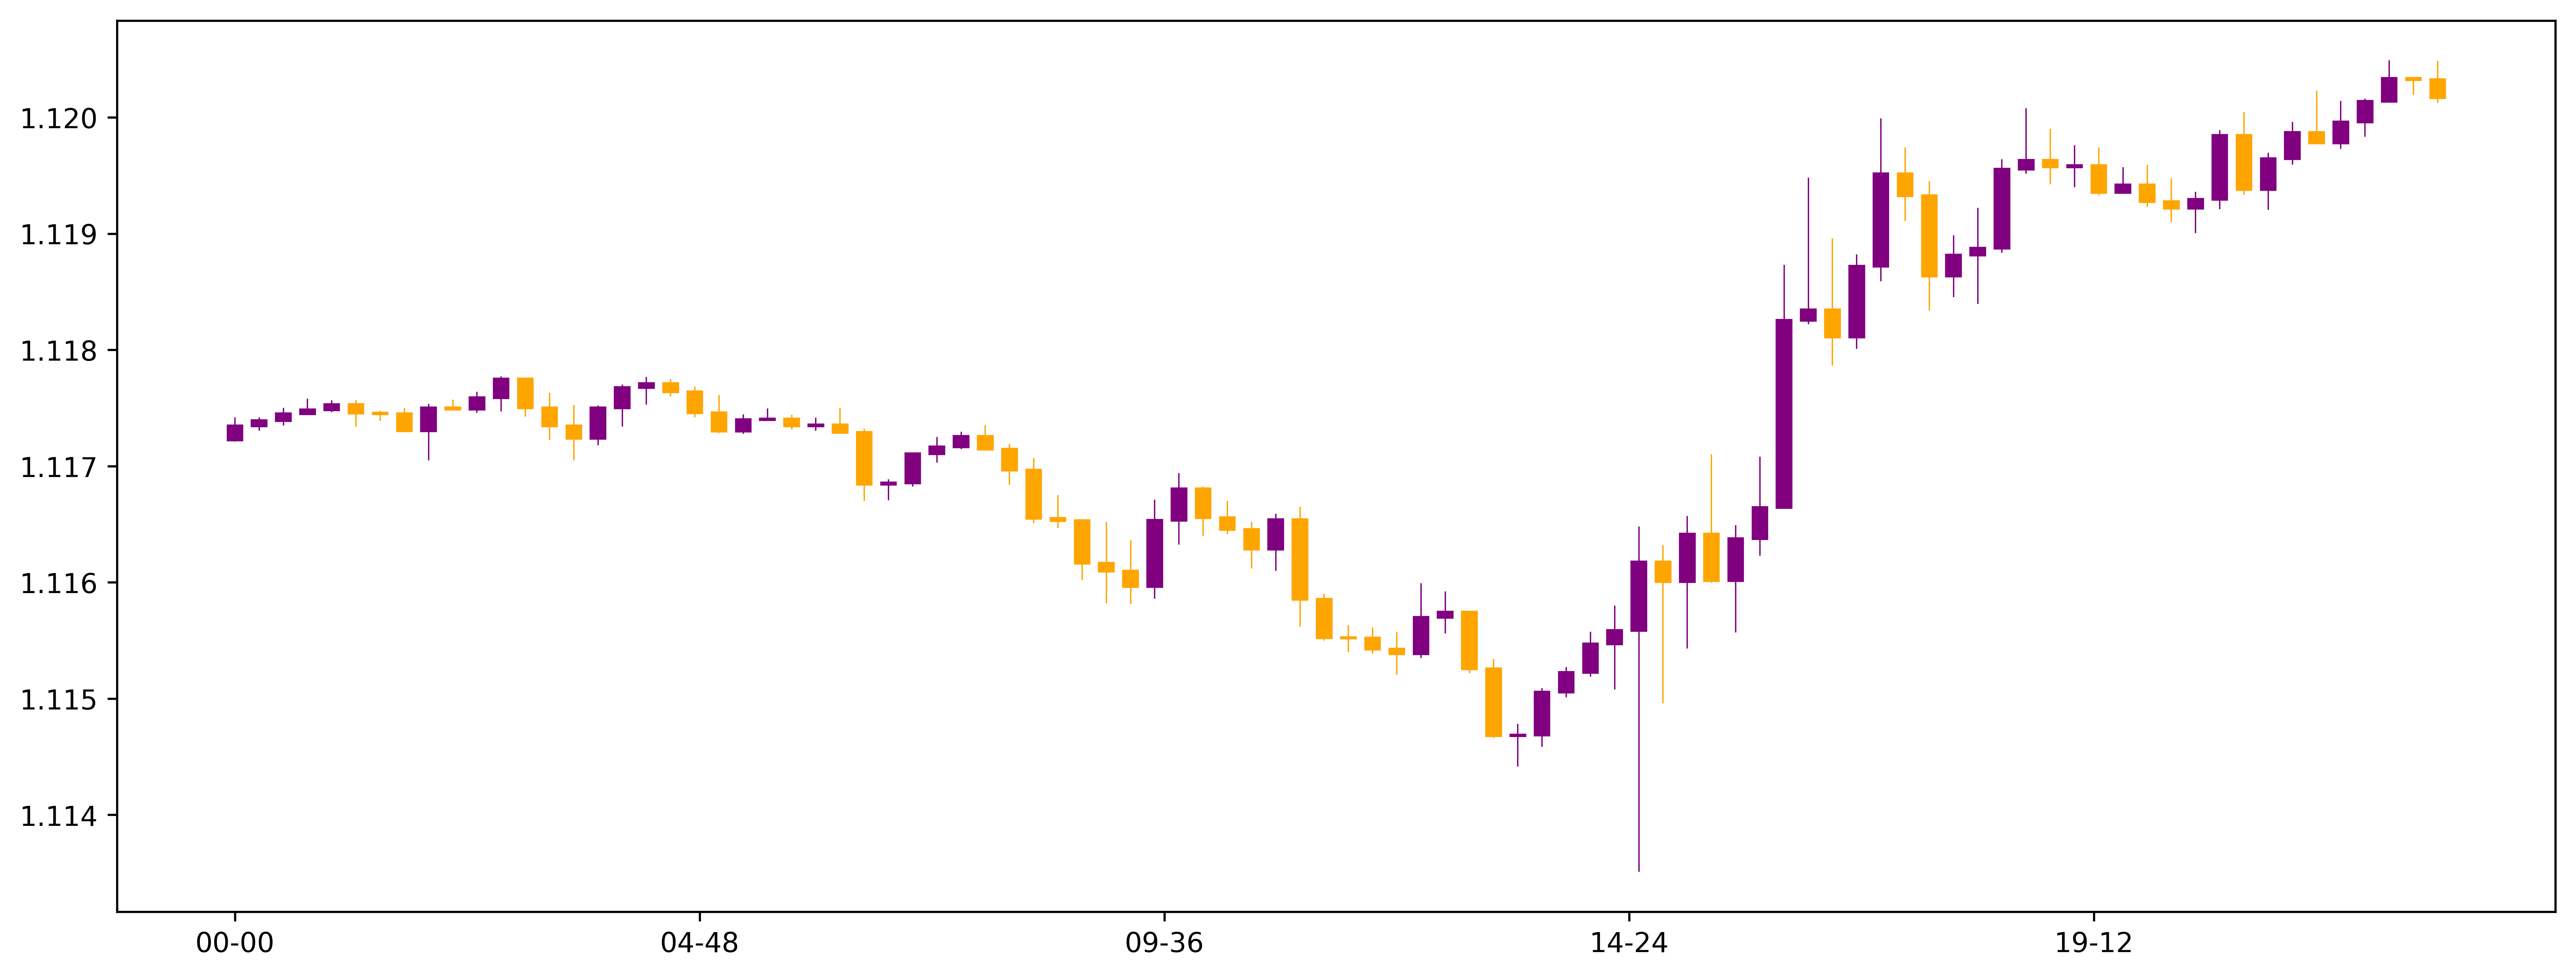

In [52]:
date_index = df.index
date = pd.to_datetime(date_index)
df.loc[:,'Date'] = date
df.loc[:,"Date"] = df["Date"].apply(mdates.date2num)
ohlc= df[['Date', 'Open', 'High', 'Low','Close']].copy()
f1, ax = plt.subplots(figsize = (16,6),dpi=600)
candlestick_ohlc(ax, ohlc.values, width=0.006, colorup='purple', colordown='orange')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

In [63]:
df.iloc[5:10]

,Open,High,Low,Close,Date
Date,,,,,
20190503 01:15:00,1.117530,1.117560,1.117345,1.117455,737182.052083
20190503 01:30:00,1.117455,1.117470,1.117395,1.117450,737182.062500
20190503 01:45:00,1.117450,1.117495,1.117300,1.117305,737182.072917
20190503 02:00:00,1.117305,1.117530,1.117055,1.117500,737182.083333
20190503 02:15:00,1.117500,1.117565,1.117490,1.117490,737182.093750


In [67]:
high_max_list = []
low_max_list = []
date_high = []
date_low = []
high_max = df.iloc[0,1]
low_max = df.iloc[0,2]
plot_high =[]
plot_low = []

high_max_list = list(find_peaks(df.iloc[:,1].values,distance=5)[0])
low_max_list = list(find_peaks(df.iloc[:,2].values,distance=5)[0])


In [68]:
high_max_list,low_max_list

([3, 11, 17, 25, 31, 39, 44, 49, 61, 68, 74, 83, 89],
 [4, 9, 18, 30, 41, 50, 56, 61, 69, 74, 83, 90])

In [60]:
df.index[high_max_list[3]],(df.iloc[3,4])

('20190503  07:45:00', 737182.03125)

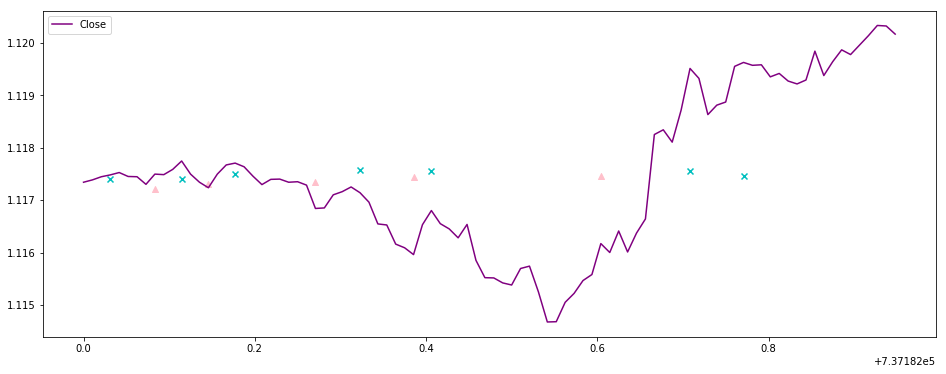

In [57]:
plt.figure(figsize=(16,6))
plt.plot(df['Date'],df['Close'],color='purple')
for ihigh in range(0,len(high_max_list)-1):
    plt.scatter(df.iloc[[high_max_list[ihigh]],4],df.iloc[ihigh,1],c='c',marker = 'x')
for ilow in range(0,len(low_max_list)-1):
    plt.scatter(df.iloc[[low_max_list[ilow]],4],df.iloc[ilow,2],c='pink',marker='^')
plt.legend()

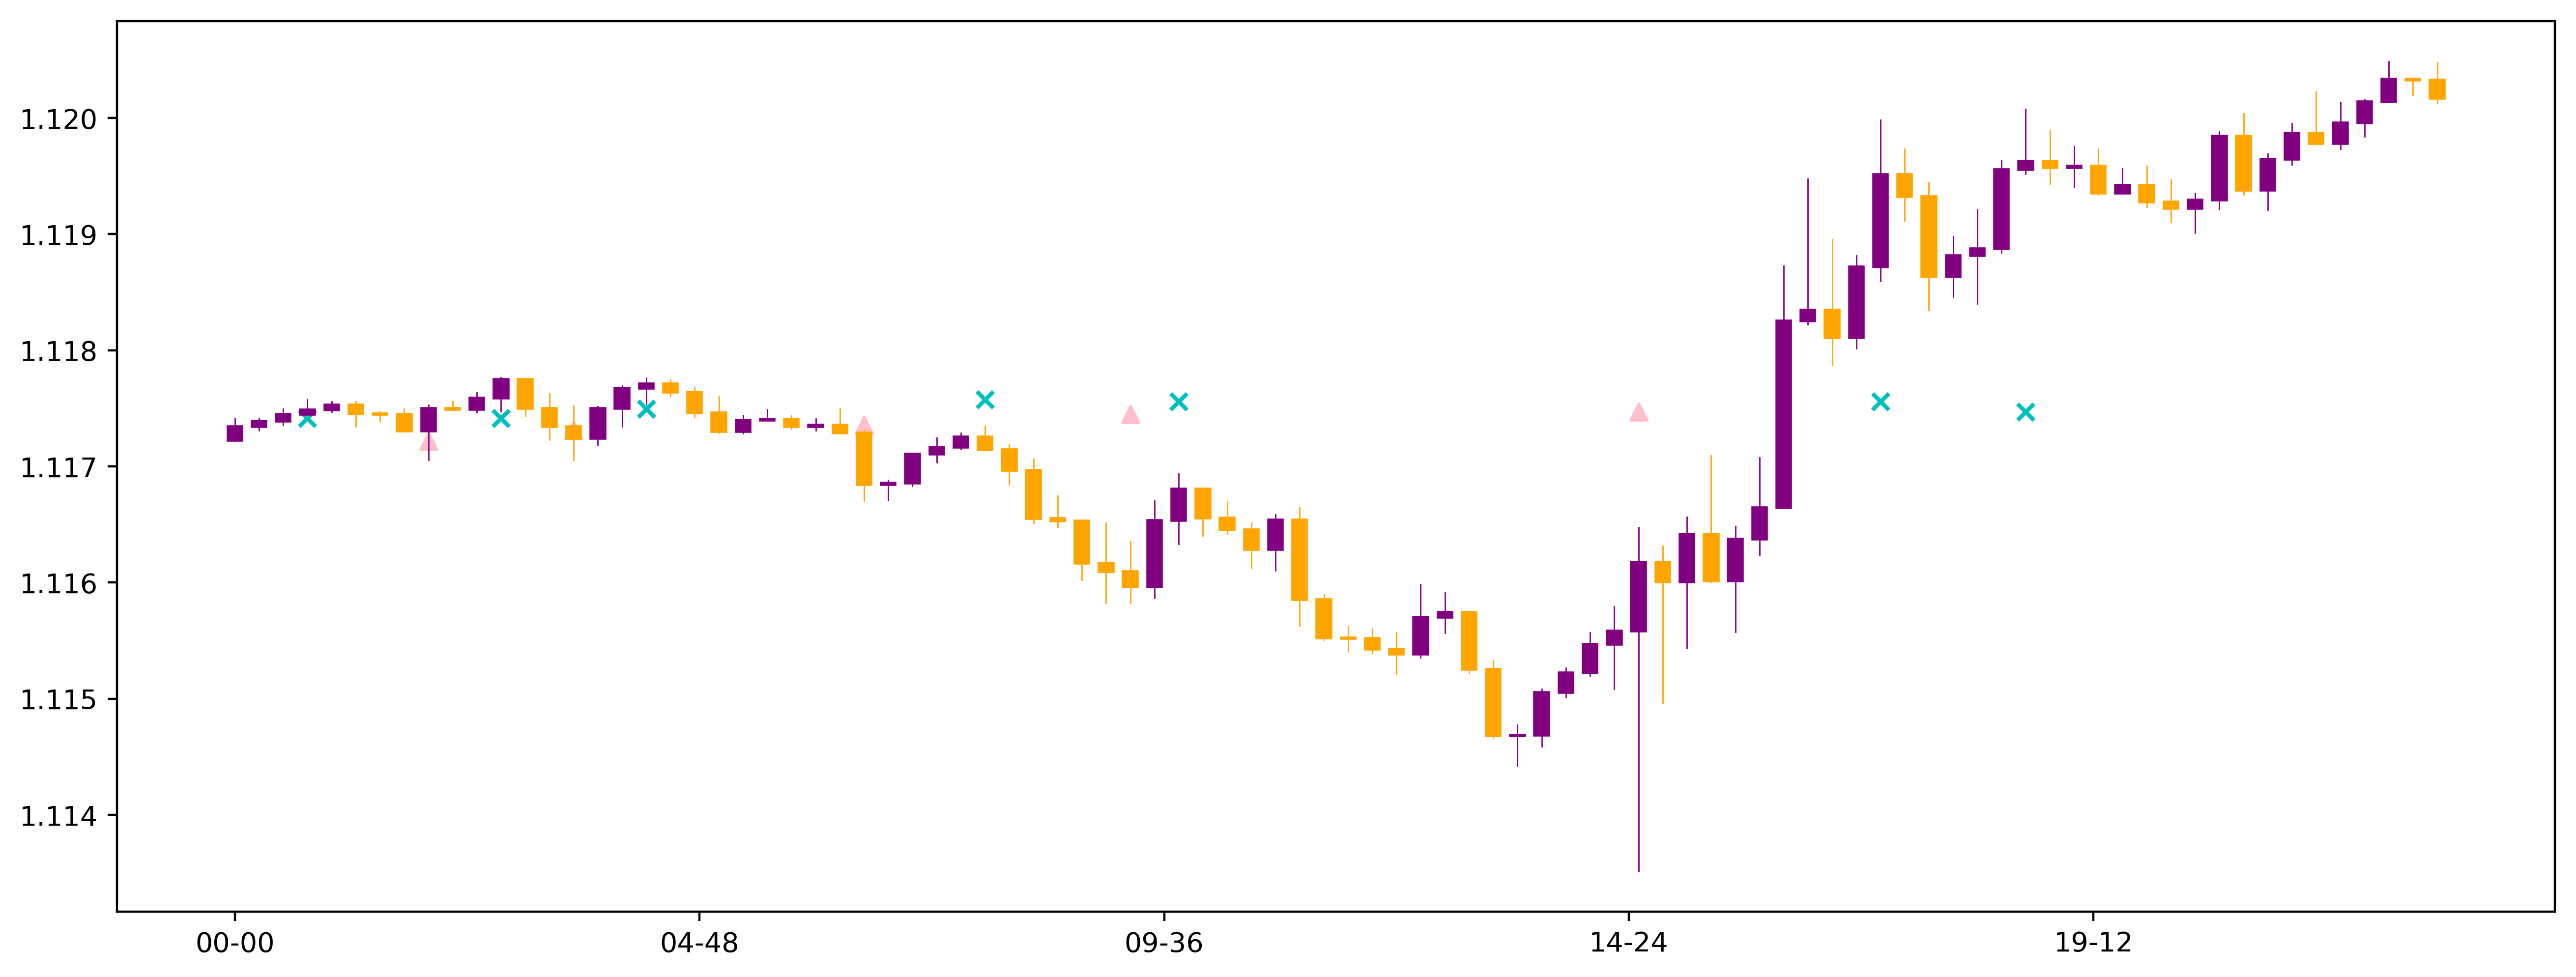

In [58]:
f1, ax = plt.subplots(figsize = (16,6),dpi=400)

for i in range(0,len(high_max_list)-1):
    plt.scatter(df.iloc[[high_max_list[i]],4],df.iloc[i,1],c='c',marker = 'x')
for i in range(0,len(low_max_list)-1):
    plt.scatter(df.iloc[[low_max_list[i]],4],df.iloc[i,2],c='pink',marker='^')
candlestick_ohlc(ax, ohlc.values, width=0.006, colorup='purple', colordown='orange')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))


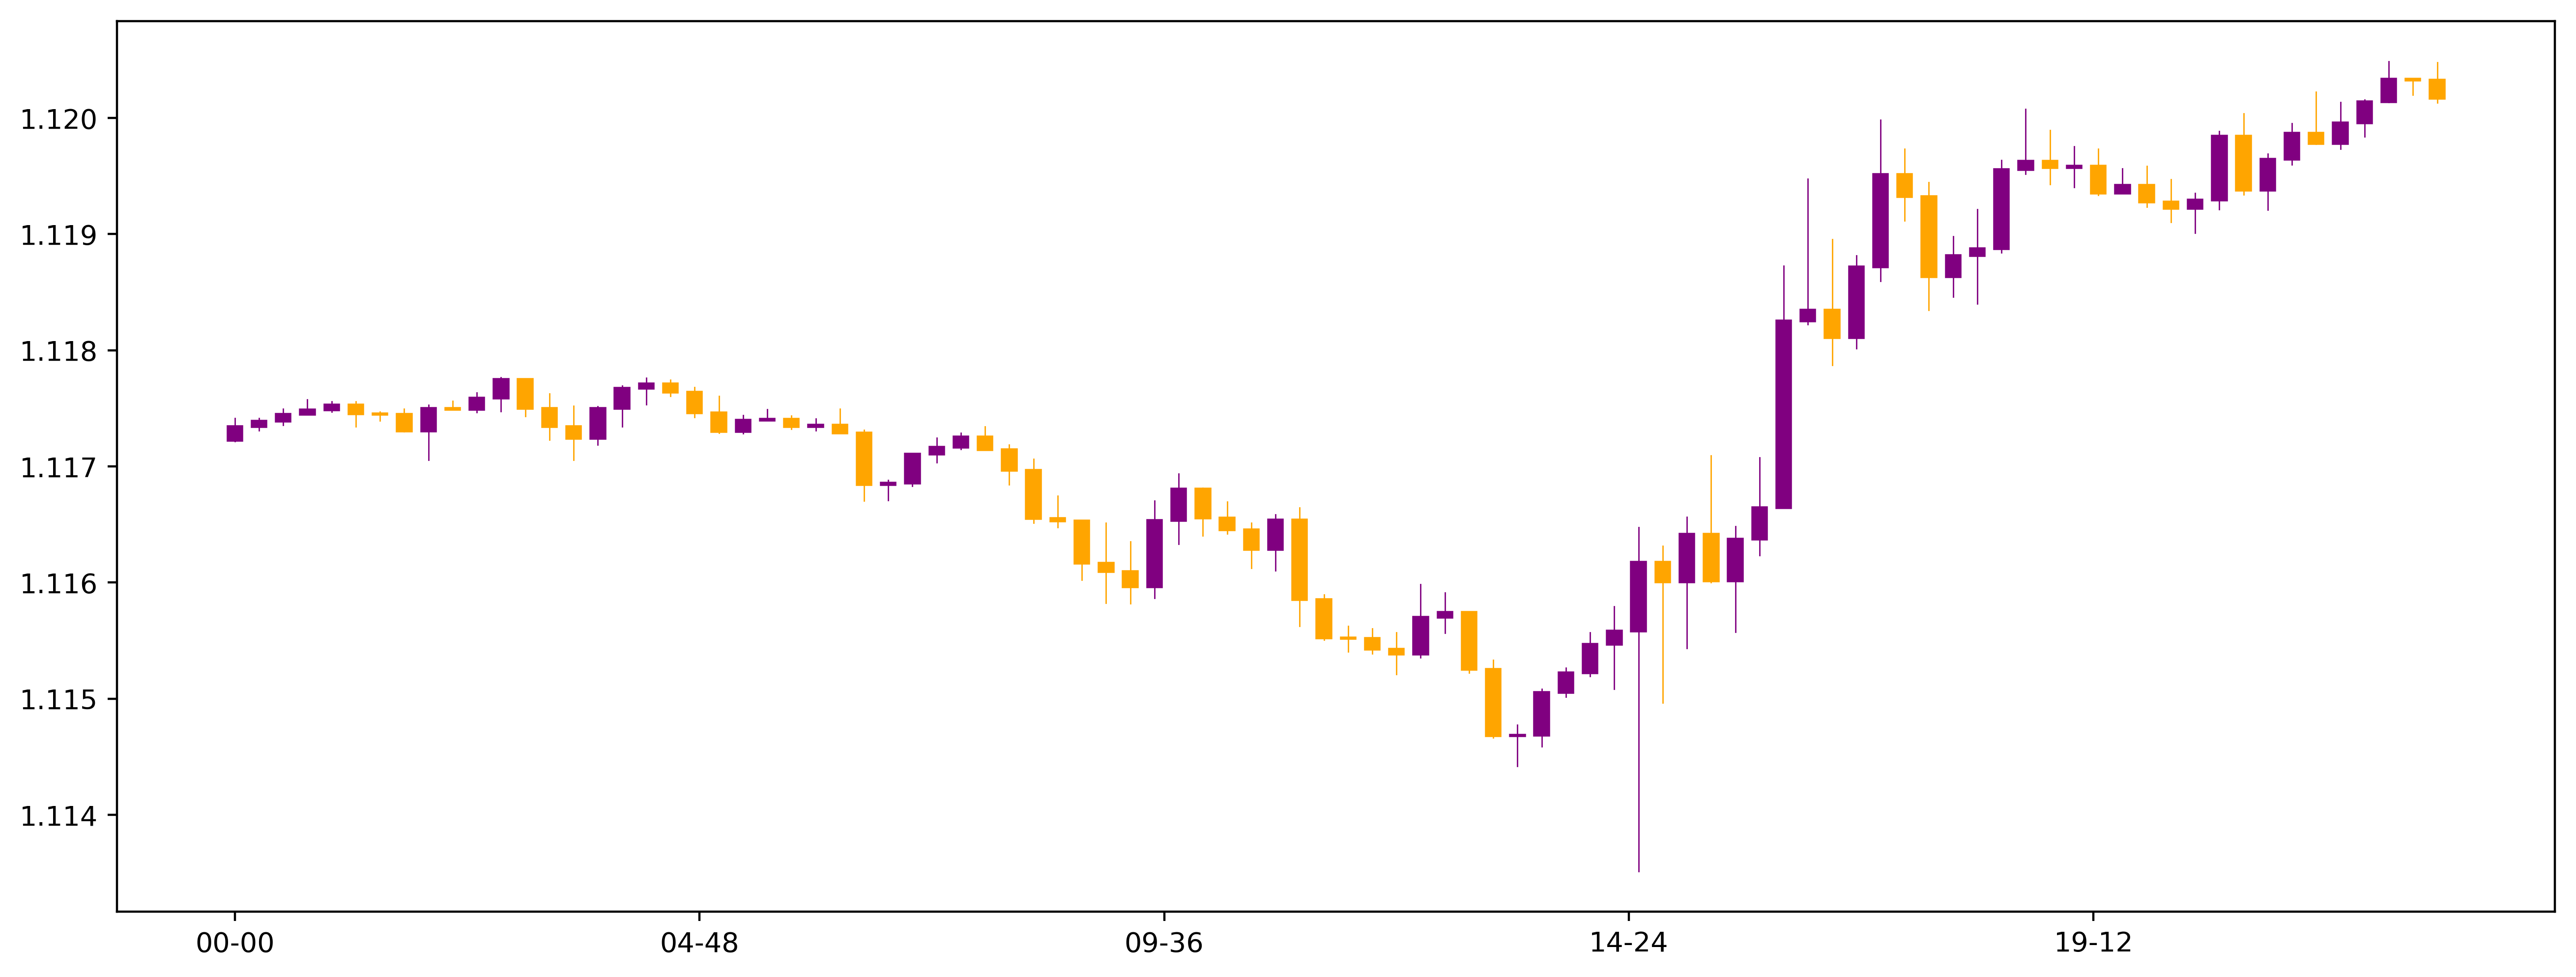

In [59]:
f1, ax = plt.subplots(figsize = (16,6),dpi=400)

for i in range(0,len(plot_high)-1):
    plt.scatter(plot_high[i][0],plot_high[i][1],c='turquoise',marker = 'x')
    X = [ii for ii in range(0, len(series))]
    X = numpy.reshape(X, (len(X), 1))
    y = series.values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    pyplot.plot(y)
    pyplot.plot(trend)
for i in range(0,len(plot_low)-1):
    plt.scatter(plot_low[i][0],plot_low[i][1],c='pink',marker='^')
candlestick_ohlc(ax, ohlc.values, width=0.006, colorup='purple', colordown='orange')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))

[737182.0208333334,
 737182.03125,
 737182.1041666666,
 737182.1145833334,
 737182.6666666666,
 737182.6770833334,
 737182.7083333334,
 737182.7708333334,
 737182.8958333334]

In [25]:
def hough_line(img):
  # Rho and Theta ranges
  thetas = np.deg2rad(np.arange(-90.0, 90.0))
  width = len(img)
  height = len(img)
  diag_len = np.ceil(np.sqrt(width * width + height * height))   # max_dist
  rhos = np.linspace(-diag_len, diag_len, diag_len * 2.0)

  # Cache some resuable values
  cos_t = np.cos(thetas)
  sin_t = np.sin(thetas)
  num_thetas = len(thetas)

  # Hough accumulator array of theta vs rho
  accumulator = np.zeros((2 * int(diag_len), num_thetas), dtype=(np.uint64))
  y_idxs = np.nonzero(img)
  x_idxs = np.nonzero(img)  # (row, col) indexes to edges

  # Vote in the hough accumulator
  for i in range(len(x_idxs)):
    x = x_idxs[i]
    y = y_idxs[i]

    for t_idx in range(num_thetas):
      # Calculate rho. diag_len is added for a positive index
      rho = np.round(x * cos_t[t_idx] + y * sin_t[t_idx]) + diag_len
      accumulator[rho, t_idx] += 1

  return accumulator, thetas, rhos

In [26]:
accumulator_high, thetas_high, rhos_high = hough_line(high_max_list)

/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


IndexError: arrays used as indices must be of integer (or boolean) type

In [87]:
df = df.iloc[:,:-1]
df.head()

,Open,High,Low,Close
Date,,,,
20190503 00:00:00,1.117225,1.117415,1.117215,1.117345
20190503 00:15:00,1.117345,1.117415,1.117310,1.117390
20190503 00:30:00,1.117390,1.117495,1.117355,1.117450
20190503 00:45:00,1.117450,1.117575,1.117450,1.117485
20190503 01:00:00,1.117485,1.117560,1.117470,1.117530
